In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_bank= pd.read_csv('C:/Users/KahindiE/Desktop/data_science/Bank Target Marketing Dataset.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [34]:
df_bank.shape # 45211 rows and 17 columns

(56373, 17)

In [35]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [36]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [37]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [38]:
#drop contact
df_bank.drop('contact',axis=1,inplace=True)

In [39]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


In [40]:
df_bank.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [41]:
#filter by sex
df_bank_filter_edu_tertiary = (df_bank['education']=='tertiary') & (df_bank['loan']=='yes') & (df_bank['marital']=='married')
df_bank.loc[df_bank_filter_edu_tertiary,['education','marital','loan']]

,education,marital,loan
6,tertiary,married,yes
12,tertiary,married,yes
76,tertiary,married,yes
113,tertiary,married,yes
234,tertiary,married,yes
...,...,...,...
56169,tertiary,married,yes
56221,tertiary,married,yes
56270,tertiary,married,yes
56315,tertiary,married,yes


In [42]:
df_bank.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

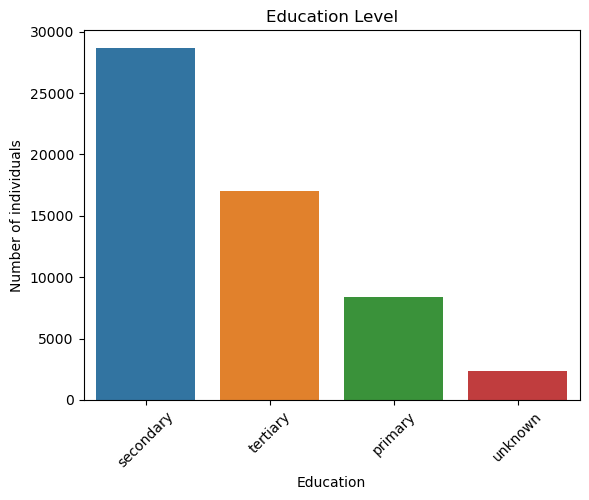

In [43]:
#barchart of eductaion
sns.countplot(x='education',data=df_bank)
plt.title('Education Level')
plt.ylabel('Number of individuals')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.show()

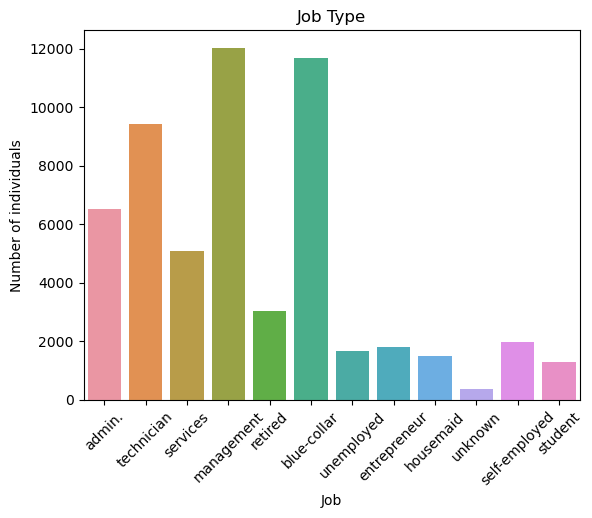

In [44]:
# bar chart of job
sns.countplot(x='job',data=df_bank)
plt.title('Job Type')
plt.ylabel('Number of individuals')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Marital Status')

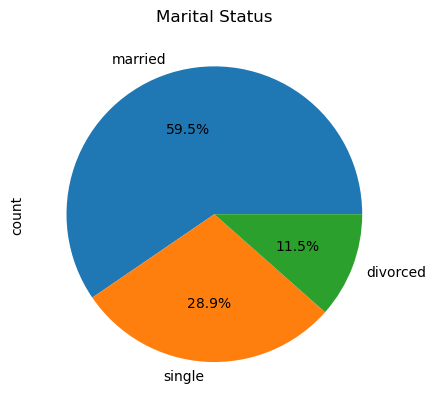

In [45]:
#pie chart of  marital status with percentages in  labels
df_bank['marital'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Marital Status')

<Figure size 1200x800 with 0 Axes>

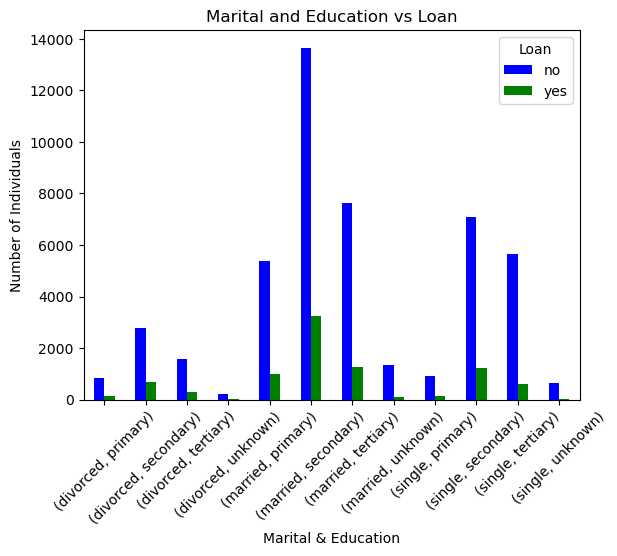

In [46]:
cross_tab = pd.crosstab(index=[df_bank['marital'], df_bank['education']], columns=df_bank['loan'])#cross tabulation
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', color=['blue', 'green'], grid=False)
plt.title('Marital and Education vs Loan')
plt.xlabel('Marital & Education')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Loan')
plt.show()

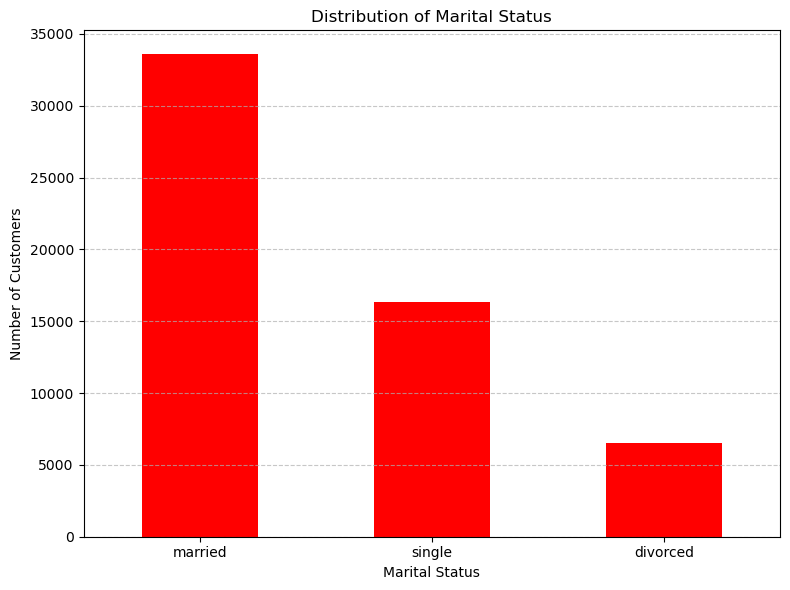

In [47]:
marital_distribution = df_bank['marital'].value_counts()
plt.figure(figsize=(8, 6))
marital_distribution.plot(kind='bar', color='red')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
#corraletion matrix
num_df = df_bank.select_dtypes(include = np.number)
num_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.101250,-0.007360,-0.001533,0.002417,-0.017132,0.005828
balance,0.101250,1.000000,0.005596,0.024846,-0.015123,0.007454,0.020500
day,-0.007360,0.005596,1.000000,-0.027839,0.157817,-0.089853,-0.053414
duration,-0.001533,0.024846,-0.027839,1.000000,-0.078064,-0.001250,0.001425
campaign,0.002417,-0.015123,0.157817,-0.078064,1.000000,-0.092324,-0.037217
pdays,-0.017132,0.007454,-0.089853,-0.001250,-0.092324,1.000000,0.466584
previous,0.005828,0.020500,-0.053414,0.001425,-0.037217,0.466584,1.000000


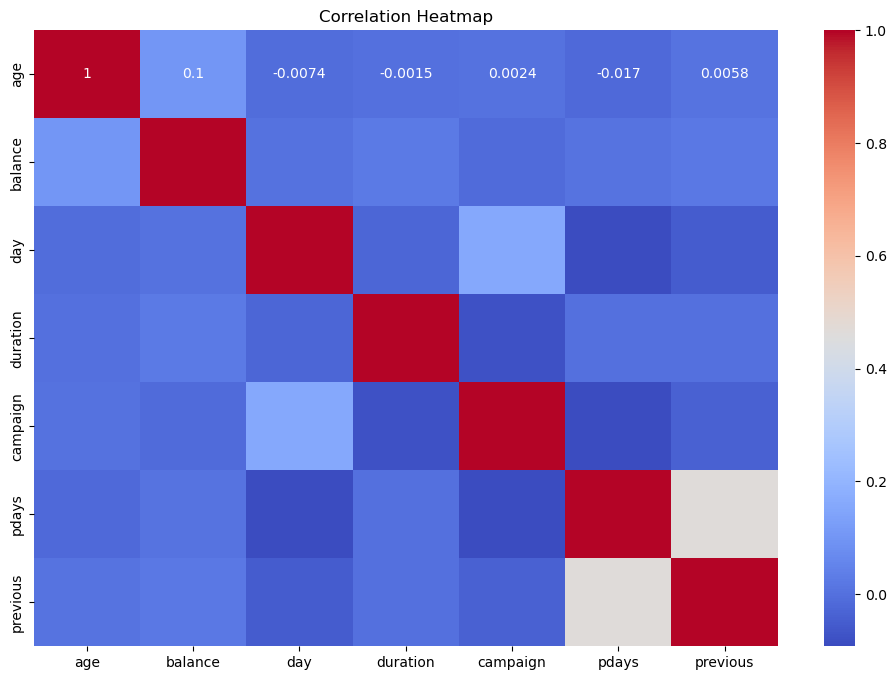

In [49]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
#covert data to dummy  variables
df_bank = pd.get_dummies(df_bank, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,yes,False,False,...,False,False,False,True,False,False,False,False,False,True


In [5]:
column_names = pd.DataFrame(df_bank.columns, columns = ["cols"])
column_names

,cols
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous
7,deposit
8,job_blue-collar
9,job_entrepreneur
